In [390]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

warnings. filterwarnings("ignore")

In [391]:
df=pd.read_csv("mergedDataset.csv")
df.shape

(1185, 34)

In [392]:
data = df.drop(["score","UA_Continent", "logo", "link"], axis=1)
data

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,Massachusetts Institute of Technology (MIT),2021,1,United States,Cambridge,North America,Private,Very High,4.0,"3,730",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Stanford University,2021,2,United States,Stanford,North America,Private,Very High,3.0,"3,879",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harvard University,2021,3,United States,Cambridge,North America,Private,Very High,5.0,"5,877",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,California Institute of Technology (Caltech),2021,4,United States,Pasadena,North America,Private,Very High,2.0,692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,University of Oxford,2021,5,United Kingdom,Oxford,Europe,Public,Very High,3.0,"8,442",...,8.5685,7.97,6.6380,7.55375,5.4380,5.9545,6.1545,5.495,8.2580,2.6290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,Weizmann Institute of Science,2021,NaN,Israel,Rehovot,Asia,Public,Very High,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1181,Universitatea de Vest din Timisoara / West Un...,2021,1001,Romania,Timișoara,Europe,Public,High,21.0,799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1182,WHU - Otto Beisheim School of Management,2021,NaN,Germany,Vallendar,Europe,Private,Very High,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183,Yarmouk University,2021,1001,Jordan,Irbid,Asia,Public,Medium,31.0,"2,826",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [393]:
#Solving the error for the numerical value
#Refercence: https://stackoverflow.com/questions/43858595/how-do-i-fix-invalid-literal-for-int-with-base-10-error-in-pandas

data['international_students'] = pd.to_numeric(data['international_students'], errors="coerce")

In [394]:
data['international_students'] = data['international_students'].astype(float)

In [395]:
data['faculty_count'] = pd.to_numeric(data['faculty_count'], errors="coerce")

In [396]:
data['faculty_count'] = data['faculty_count'].astype(float)

In [397]:
data.dropna(subset=['Unnamed: 0'], inplace=True)
data

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
4,University of Oxford,2021,5,United Kingdom,Oxford,Europe,Public,Very High,3.0,NaN,...,8.5685,7.970000,6.6380,7.55375,5.4380,5.9545,6.1545,5.4950,8.2580,2.6290
6,University of Cambridge,2021,7,United Kingdom,Cambridge,Europe,Public,Very high,4.0,NaN,...,9.5045,8.189000,6.5545,8.01650,5.4380,5.9545,5.8095,2.4550,8.4870,0.5000
7,Imperial College London,2021,8,United Kingdom,London,Europe,Public,Very High,5.0,NaN,...,7.2435,8.018000,9.0270,5.54775,5.4380,5.9545,5.8455,9.4555,6.5730,5.3745
9,UCL,2021,10,United Kingdom,London,Europe,Public,Very High,5.0,NaN,...,7.2435,8.018000,9.0270,5.54775,5.4380,5.9545,5.8455,9.4555,6.5730,5.3745
10,National University of Singapore (NUS),2021,11,Singapore,Singapore,Asia,Public,Very High,7.0,NaN,...,9.9715,7.682667,8.2465,7.95425,7.4785,9.9590,8.4470,7.4225,6.4950,5.8340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,University of the Western Cape,2021,1001,South Africa,Cape Town,Africa,Public,High,24.0,NaN,...,5.3280,4.343000,0.8945,6.60850,2.7680,5.1510,5.6125,4.7360,3.6605,6.7505
1175,University POLITEHNICA of Bucharest,2021,1001,Romania,Bucharest,Europe,Public,Very High,24.0,922.0,...,8.9860,6.075333,2.4475,3.41925,4.1030,6.8390,9.6380,6.9595,8.6865,1.9675
1176,Université de Toulouse II-Le Mirail,2021,1001,France,Toulouse,Europe,Public,High,58.0,NaN,...,6.9670,8.832000,4.4420,5.07975,4.2045,2.6480,4.6220,4.1370,7.6335,3.3040
1179,Warsaw University of Life Sciences – SGGW (WUL...,2021,1001,Poland,Warsaw,Europe,Public,Very High,12.0,NaN,...,8.6995,6.881667,4.6685,6.38900,4.7615,5.0970,6.0000,7.3355,4.6360,4.9610


In [398]:
data["rank_display"]= data["rank_display"].fillna("1001")

In [399]:
#Fill na values for categorical variables
#Reference: https://stackoverflow.com/questions/49050974/how-fill-na-null-for-categorical-varibles-in-python-using-fillna-function
data['rank_display'].fillna(data['rank_display'].value_counts().index[0], inplace=True)

In [400]:
data['type'].fillna(data['type'].value_counts().index[0], inplace=True)

In [401]:
data['research_output'].fillna(data['research_output'].value_counts().index[0], inplace=True)

In [402]:
data['student_faculty_ratio'].fillna(data['student_faculty_ratio'].mean(), inplace=True)

In [403]:
data['international_students'].fillna(data['international_students'].mean(), inplace=True)

In [404]:
data['size'].fillna(data['size'].value_counts().index[0], inplace=True)

In [405]:
data['faculty_count'].fillna(data['faculty_count'].mean(), inplace=True)

In [406]:
data.isnull().sum()

university                0
year                      0
rank_display              0
country                   0
city                      0
region                    0
type                      0
research_output           0
student_faculty_ratio     0
international_students    0
size                      0
faculty_count             0
Unnamed: 0                0
Housing                   0
Cost of Living            0
Startups                  0
Venture Capital           0
Travel Connectivity       0
Commute                   0
Business Freedom          0
Safety                    0
Healthcare                0
Education                 0
Environmental Quality     0
Economy                   0
Taxation                  0
Internet Access           0
Leisure & Culture         0
Tolerance                 0
Outdoors                  0
dtype: int64

In [407]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [408]:
data.columns

Index(['university', 'year', 'rank_display', 'country', 'city', 'region',
       'type', 'research_output', 'student_faculty_ratio',
       'international_students', 'size', 'faculty_count', 'Housing',
       'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity',
       'Commute', 'Business Freedom', 'Safety', 'Healthcare', 'Education',
       'Environmental Quality', 'Economy', 'Taxation', 'Internet Access',
       'Leisure & Culture', 'Tolerance', 'Outdoors'],
      dtype='object')

In [409]:

data.loc[data['student_faculty_ratio'] == 0, "student_faculty_ratio"]=data['student_faculty_ratio'].mean()
data.loc[data['international_students'] == 0, "international_students"]=data['international_students'].mean()
data.loc[data['faculty_count'] == 0, "faculty_count"]=data['faculty_count'].mean()
data.loc[data['Housing'] == 0, "Housing"]=data['Housing'].mean()
data.loc[data['Cost of Living'] == 0, "Cost of Living"]=data['Cost of Living'].mean()
data.loc[data['Startups'] == 0, "Startups"]=data['Startups'].mean()
data.loc[data['Venture Capital'] == 0, "Venture Capital"]=data['Venture Capital'].mean()
data.loc[data['Travel Connectivity'] == 0, "Travel Connectivity"]=data['Travel Connectivity'].mean()
data.loc[data['Commute'] == 0, "Commute"]=data['Commute'].mean()
data.loc[data['Business Freedom'] == 0, "Business Freedom"]=data['Business Freedom'].mean()
data.loc[data['Safety'] == 0, "Safety"]=data['Safety'].mean()
data.loc[data['Healthcare'] == 0, "Healthcare"]=data['Healthcare'].mean()
data.loc[data['Education'] == 0, "Education"]=data['Education'].mean()
data.loc[data['Environmental Quality'] == 0, "Environmental Quality"]=data['Environmental Quality'].mean()
data.loc[data['Economy'] == 0, "Economy"]=data['Economy'].mean()
data.loc[data['Taxation'] == 0, "Taxation"]=data['Taxation'].mean()
data.loc[data['Internet Access'] == 0, "Internet Access"]=data['Internet Access'].mean()
data.loc[data['Leisure & Culture'] == 0, "Leisure & Culture"]=data['Leisure & Culture'].mean()
data.loc[data['Tolerance'] == 0, "Tolerance"]=data['Tolerance'].mean()
data.loc[data['Outdoors'] == 0, "Outdoors"]=data['Outdoors'].mean()



In [410]:
data=data.reset_index()


In [411]:
data.drop('index', inplace=True, axis=1)
data

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,University of Oxford,2021,5,United Kingdom,Oxford,Europe,Public,Very High,3.0,227.089556,...,8.5685,7.970000,6.6380,7.55375,5.4380,5.9545,6.1545,5.4950,8.2580,2.6290
1,University of Cambridge,2021,7,United Kingdom,Cambridge,Europe,Public,Very high,4.0,227.089556,...,9.5045,8.189000,6.5545,8.01650,5.4380,5.9545,5.8095,2.4550,8.4870,0.5000
2,Imperial College London,2021,8,United Kingdom,London,Europe,Public,Very High,5.0,227.089556,...,7.2435,8.018000,9.0270,5.54775,5.4380,5.9545,5.8455,9.4555,6.5730,5.3745
3,UCL,2021,10,United Kingdom,London,Europe,Public,Very High,5.0,227.089556,...,7.2435,8.018000,9.0270,5.54775,5.4380,5.9545,5.8455,9.4555,6.5730,5.3745
4,National University of Singapore (NUS),2021,11,Singapore,Singapore,Asia,Public,Very High,7.0,227.089556,...,9.9715,7.682667,8.2465,7.95425,7.4785,9.9590,8.4470,7.4225,6.4950,5.8340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,University of the Western Cape,2021,1001,South Africa,Cape Town,Africa,Public,High,24.0,227.089556,...,5.3280,4.343000,0.8945,6.60850,2.7680,5.1510,5.6125,4.7360,3.6605,6.7505
351,University POLITEHNICA of Bucharest,2021,1001,Romania,Bucharest,Europe,Public,Very High,24.0,922.000000,...,8.9860,6.075333,2.4475,3.41925,4.1030,6.8390,9.6380,6.9595,8.6865,1.9675
352,Université de Toulouse II-Le Mirail,2021,1001,France,Toulouse,Europe,Public,High,58.0,227.089556,...,6.9670,8.832000,4.4420,5.07975,4.2045,2.6480,4.6220,4.1370,7.6335,3.3040
353,Warsaw University of Life Sciences – SGGW (WUL...,2021,1001,Poland,Warsaw,Europe,Public,Very High,12.0,227.089556,...,8.6995,6.881667,4.6685,6.38900,4.7615,5.0970,6.0000,7.3355,4.6360,4.9610


In [412]:
data.shape

(355, 29)

In [413]:
data["type"].unique()

array(['Public', 'Private'], dtype=object)

In [414]:
data["research_output"].unique()

array(['Very High', 'Very high', 'High', 'Medium', 'Low'], dtype=object)

In [415]:
data.loc[data["research_output"]=="Very High","research_output"]="Very high"

In [416]:
data["research_output"].unique()

array(['Very high', 'High', 'Medium', 'Low'], dtype=object)

In [417]:
data["size"].unique()

array(['L', 'XL', 'M', 'S'], dtype=object)

In [418]:
catColumnsPos = [data.columns.get_loc(col) for col in list(data.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(data.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))


Categorical columns           : ['university', 'rank_display', 'country', 'city', 'region', 'type', 'research_output', 'size']
Categorical columns position  : [0, 2, 3, 4, 5, 6, 7, 10]


In [419]:
numColumnsPos = [data.columns.get_loc(col) for col in list(data.select_dtypes('float').columns)]
print('Numerical columns           : {}'.format(list(data.select_dtypes('float').columns)))
print('Numerical columns position  : {}'.format(numColumnsPos))



Numerical columns           : ['student_faculty_ratio', 'international_students', 'faculty_count', 'Housing', 'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity', 'Commute', 'Business Freedom', 'Safety', 'Healthcare', 'Education', 'Environmental Quality', 'Economy', 'Taxation', 'Internet Access', 'Leisure & Culture', 'Tolerance', 'Outdoors']
Numerical columns position  : [8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [420]:
# Convert dataframe to matrix
dfMatrix = data.to_numpy()
dfMatrix

array([['University of Oxford', 2021, '5', ..., 5.495, 8.258000000000001,
        2.6290000000000004],
       ['University of Cambridge', 2021, '7', ..., 2.455,
        8.487000000000002, 0.5],
       ['Imperial College London', 2021, '8', ..., 9.4555,
        6.5729999999999995, 5.3744999999999985],
       ...,
       ['Université de Toulouse II-Le Mirail', 2021, '1001', ...,
        4.1370000000000005, 7.6335, 3.3040000000000003],
       ['Warsaw University of Life Sciences – SGGW (WULS-SGGW)', 2021,
        '1001', ..., 7.3355000000000015, 4.636000000000001, 4.961],
       ['Yildiz Technical University', 2021, '1001', ..., 10.0, 3.8925,
        5.7435]], dtype=object)

Text(0, 0.5, 'Cost')

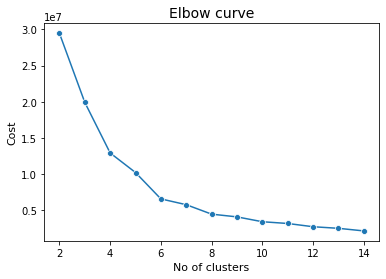

In [421]:
#K-Prototype
#References: https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb
#            https://antonsruberts.github.io/kproto-audience/
#            https://python.plainenglish.io/data-science-project-clustering-mixed-data-7d5fd6e7f047

import seaborn as sns
num_clusters = list(range(2, 15))
cost_values = []
# calculate cost values for each number of clusters (2 to 15)
for k in num_clusters:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(dfMatrix, categorical= catColumnsPos)
    cost_values.append(kproto.cost_)
# plot cost against number of clusters
ax = sns.lineplot(x=num_clusters, y=cost_values, marker="o")
ax.set_title('Elbow curve', fontsize=14)
ax.set_xlabel('No of clusters', fontsize=11)
ax.set_ylabel('Cost', fontsize=11)

In [422]:
kprototype = KPrototypes(n_jobs = -1, n_clusters = 6, init = 'Huang', random_state = 0)
clusters=kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

In [423]:
# Cluster centorid
print(kprototype.cluster_centroids_)
# Check the iteration of the clusters created
print(kprototype.n_iter_)
# Check the cost of the clusters created
print(kprototype.cost_)

[['2021.0' '13.816901408450704' '48.933721439749625' '5.516183098591548'
  '7.317584507042252' '6.712153183892084' '4.749072941876614'
  '3.423613648085697' '4.180598591549297' '5.121429577464789'
  '6.834131455399062' '7.3619507042253565' '7.0359906103286365'
  '3.8844389803610397' '5.242154929577468' '4.420901408450705'
  '5.247401408450705' '4.987802816901411' '6.988809859154927'
  '6.308077464788733' '4.756274647887323'
  'Abai Kazakh National Pedagogical University' '801-1000' 'South Korea'
  'Seoul' 'Europe' 'Public' 'Very high' 'L']
 ['2021.0' '14.592592592592593' '692.5925925925926' '189.5332538011696'
  '8.17933333333333' '7.107999999999999' '4.595203703703704'
  '2.7198419405320813' '3.214944444444444' '5.2226449921752724'
  '6.160160493827159' '7.3978518518518515' '6.854666666666666'
  '3.0043025039123643' '4.6869259259259275' '3.677537037037036'
  '5.4792592592592575' '4.320814814814814' '6.778500000000001'
  '7.020629629629631' '4.599833333333334'
  'AGH University of Scie

In [424]:
# Add the cluster to the dataframe
data['Cluster Labels'] = kprototype.labels_
data['Segment'] = data['Cluster Labels'].map({0:1, 1:2 ,2:3 ,3:4 ,4: 5 ,5:6 })
# Order the cluster
data['Segment'] = data['Segment'].astype('category')
data['Segment'] = data['Segment'].cat.reorder_categories([1,2,3,4,5,6])

In [425]:
lgbm_data = data.copy()
for c in lgbm_data.select_dtypes(include='object'):
    lgbm_data[c] = lgbm_data[c].astype('category')



In [426]:
from lightgbm import LGBMRegressor, LGBMClassifier, Booster
from sklearn.model_selection import cross_val_score
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, lgbm_data, kprototype.labels_, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
CV F1 score for K-Prototypes clusters is 0.9937402190923319


In [427]:
min_value = data['student_faculty_ratio'].min()
max_value = data['student_faculty_ratio'].max()
print(min_value)
print(max_value)

3.0
58.0


In [428]:
bins = np.linspace(min_value,max_value,6)
bins

array([ 3., 14., 25., 36., 47., 58.])

In [429]:
labels = [1,2,3,4,5]

In [430]:
data.loc[data["research_output"]=="Very high","research_output"]=4.0
data.loc[data["research_output"]=="High","research_output"]=3.0
data.loc[data["research_output"]=="Medimum","research_output"]=2.0
data.loc[data["research_output"]=="Low","research_output"]=1.0

In [431]:
data.loc[data["research_output"]=="Very high","research_output"]=4.0
data.loc[data["research_output"]=="High","research_output"]=3.0
data.loc[data["research_output"]=="Medium","research_output"]=2.0
data.loc[data["research_output"]=="Low","research_output"]=1.0

In [432]:
data.loc[data["size"]=="XL","size"]=4.0
data.loc[data["size"]=="L","size"]=3.0
data.loc[data["size"]=="M","size"]=2.0
data.loc[data["size"]=="S","size"]=1.0

In [433]:
data.loc[data["type"]=="Public","type"]=2.0
data.loc[data["type"]=="Private","type"]=1.0

In [434]:
#Data Binning:
#Reference: https://github.com/alod83/data-science/blob/master/Preprocessing/Binning/Data%20Preprocessing%20-%20Binning.ipynb
data['student_faculty_ratio'] = pd.cut(data['student_faculty_ratio'], bins=bins, labels=labels, include_lowest=True)

In [435]:
min_value = data['international_students'].min()
max_value = data['international_students'].max()
print(min_value)
print(max_value)

1.122
996.0


In [436]:
bins = np.linspace(min_value,max_value,6)
bins

array([  1.122 , 200.0976, 399.0732, 598.0488, 797.0244, 996.    ])

In [437]:
data['international_students'] = pd.cut(data['international_students'], bins=bins, labels=labels, include_lowest=True)

In [438]:
min_value = data['faculty_count'].min()
max_value = data['faculty_count'].max()
print(min_value)
print(max_value)


1.0170000000000001
2724.0


In [439]:
bins = np.linspace(min_value,max_value,6)
bins

array([1.0170000e+00, 5.4561360e+02, 1.0902102e+03, 1.6348068e+03,
       2.1794034e+03, 2.7240000e+03])

In [440]:
data['faculty_count'] = pd.cut(data['faculty_count'], bins=bins, labels=labels, include_lowest=True)

In [441]:
min_value = data['Housing'].min()
max_value = data['Housing'].max()
print(min_value)
print(max_value)

1.0
10.0


In [442]:
bins = np.linspace(min_value,max_value,6)
bins

array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. ])

In [443]:
data['Housing'] = pd.cut(data['Housing'], bins=bins, labels=labels, include_lowest=True)

In [444]:
min_value = data['Cost of Living'].min()
max_value = data['Cost of Living'].max()
print(min_value)
print(max_value)

1.0
10.0


In [445]:
bins = np.linspace(min_value,max_value,6)
bins

array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. ])

In [446]:
data['Cost of Living'] = pd.cut(data['Cost of Living'], bins=bins, labels=labels, include_lowest=True)

In [447]:
min_value = data['Startups'].min()
max_value = data['Startups'].max()
print(min_value)
print(max_value)

1.1475
10.0


In [448]:
bins = np.linspace(min_value,max_value,6)
bins

array([ 1.1475,  2.918 ,  4.6885,  6.459 ,  8.2295, 10.    ])

In [449]:
data['Startups'] = pd.cut(data['Startups'], bins=bins, labels=labels, include_lowest=True)

In [450]:
min_value = data['Venture Capital'].min()
max_value = data['Venture Capital'].max()
print(min_value)
print(max_value)

1.0
9.859


In [451]:
bins = np.linspace(min_value,max_value,6)
bins

array([1.    , 2.7718, 4.5436, 6.3154, 8.0872, 9.859 ])

In [452]:
data['Venture Capital'] = pd.cut(data['Venture Capital'], bins=bins, labels=labels, include_lowest=True)

In [453]:
min_value = data['Travel Connectivity'].min()
max_value = data['Travel Connectivity'].max()
print(min_value)
print(max_value)

0.8334999999999999
10.0


In [454]:
bins = np.linspace(min_value,max_value,6)
bins

array([ 0.8335,  2.6668,  4.5001,  6.3334,  8.1667, 10.    ])

In [455]:
data['Travel Connectivity'] = pd.cut(data['Travel Connectivity'], bins=bins, labels=labels, include_lowest=True)

In [456]:
min_value = data['Commute'].min()
max_value = data['Commute'].max()
print(min_value)
print(max_value)

1.1420000000000001
6.7285


In [457]:
bins = np.linspace(min_value,max_value,6)
bins

array([1.142 , 2.2593, 3.3766, 4.4939, 5.6112, 6.7285])

In [458]:
data['Commute'] = pd.cut(data['Commute'], bins=bins, labels=labels, include_lowest=True)

In [459]:
min_value = data['Business Freedom'].min()
max_value = data['Business Freedom'].max()
print(min_value)
print(max_value)

1.0
10.0


In [460]:
bins = np.linspace(min_value,max_value,6)
bins

array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. ])

In [461]:
data['Business Freedom'] = pd.cut(data['Business Freedom'], bins=bins, labels=labels, include_lowest=True)

In [462]:
min_value = data['Safety'].min()
max_value = data['Safety'].max()
print(min_value)
print(max_value)

5.121000000000001
10.0


In [463]:
bins = np.linspace(min_value,max_value,6)
bins

array([ 5.121 ,  6.0968,  7.0726,  8.0484,  9.0242, 10.    ])

In [464]:
data['Safety'] = pd.cut(data['Safety'], bins=bins, labels=labels, include_lowest=True)

In [465]:
min_value = data['Healthcare'].min()
max_value = data['Healthcare'].max()
print(min_value)
print(max_value)

3.5983333333333327
9.078666666666667


In [466]:
bins = np.linspace(min_value,max_value,6)
bins

array([3.59833333, 4.6944    , 5.79046667, 6.88653333, 7.9826    ,
       9.07866667])

In [467]:
data['Healthcare'] = pd.cut(data['Healthcare'], bins=bins, labels=labels, include_lowest=True)

In [468]:
min_value = data['Education'].min()
max_value = data['Education'].max()
print(min_value)
print(max_value)

0.5
9.027000000000001


In [469]:
bins = np.linspace(min_value,max_value,6)
bins

array([0.5   , 2.2054, 3.9108, 5.6162, 7.3216, 9.027 ])

In [470]:
data['Education'] = pd.cut(data['Education'], bins=bins, labels=labels, include_lowest=True)

In [471]:
min_value = data['Environmental Quality'].min()
max_value = data['Environmental Quality'].max()
print(min_value)
print(max_value)

1.1555000000000002
9.416


In [472]:
bins = np.linspace(min_value,max_value,6)
bins

array([1.1555, 2.8076, 4.4597, 6.1118, 7.7639, 9.416 ])

In [473]:
data['Environmental Quality'] = pd.cut(data['Environmental Quality'], bins=bins, labels=labels, include_lowest=True)

In [474]:
min_value = data['Economy'].min()
max_value = data['Economy'].max()
print(min_value)
print(max_value)

1.6380000000000001
9.39


In [475]:
bins = np.linspace(min_value,max_value,6)
bins

array([1.638 , 3.1884, 4.7388, 6.2892, 7.8396, 9.39  ])

In [476]:
data['Economy'] = pd.cut(data['Economy'], bins=bins, labels=labels, include_lowest=True)

In [477]:
min_value = data['Taxation'].min()
max_value = data['Taxation'].max()
print(min_value)
print(max_value)

0.5
10.0


In [478]:
bins = np.linspace(min_value,max_value,6)
bins

array([ 0.5,  2.4,  4.3,  6.2,  8.1, 10. ])

In [479]:
data['Taxation'] = pd.cut(data['Taxation'], bins=bins, labels=labels, include_lowest=True)

In [480]:
min_value = data['Internet Access'].min()
max_value = data['Internet Access'].max()
print(min_value)
print(max_value)

1.0
9.716000000000001


In [481]:
bins = np.linspace(min_value,max_value,6)
bins

array([1.    , 2.7432, 4.4864, 6.2296, 7.9728, 9.716 ])

In [482]:
data['Internet Access'] = pd.cut(data['Internet Access'], bins=bins, labels=labels, include_lowest=True)

In [483]:
min_value = data['Leisure & Culture'].min()
max_value = data['Leisure & Culture'].max()
print(min_value)
print(max_value)

1.0
10.0


In [484]:
bins = np.linspace(min_value,max_value,6)
bins

array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. ])

In [485]:
data['Leisure & Culture'] = pd.cut(data['Leisure & Culture'], bins=bins, labels=labels, include_lowest=True)

In [486]:
min_value = data['Tolerance'].min()
max_value = data['Tolerance'].max()
print(min_value)
print(max_value)

1.528
9.71


In [487]:
bins = np.linspace(min_value,max_value,6)
bins

array([1.528 , 3.1644, 4.8008, 6.4372, 8.0736, 9.71  ])

In [488]:
data['Tolerance'] = pd.cut(data['Tolerance'], bins=bins, labels=labels, include_lowest=True)  

In [489]:
min_value = data['Outdoors'].min()
max_value = data['Outdoors'].max()
print(min_value)
print(max_value)

0.5
7.504499999999998


In [490]:
bins = np.linspace(min_value,max_value,6)
bins

array([0.5   , 1.9009, 3.3018, 4.7027, 6.1036, 7.5045])

In [491]:
data['Outdoors'] = pd.cut(data['Outdoors'], bins=bins, labels=labels, include_lowest=True)  

In [492]:
data2 = data.drop(["rank_display","region", "country", "city", "year", "Cluster Labels"], axis=1)
data2

,university,type,research_output,student_faculty_ratio,international_students,size,faculty_count,Housing,Cost of Living,Startups,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Segment
0,University of Oxford,2,4,1,2,3,1,2,3,2,...,4,4,4,3,3,3,3,5,2,3
1,University of Cambridge,2,4,1,2,3,1,2,3,3,...,5,4,5,3,3,3,1,5,1,3
2,Imperial College London,2,4,1,2,3,1,1,2,5,...,5,5,3,3,3,3,5,4,4,3
3,UCL,2,4,1,2,4,1,1,2,5,...,5,5,3,3,3,3,5,4,4,3
4,National University of Singapore (NUS),2,4,1,2,4,1,1,2,5,...,4,5,5,4,5,5,4,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,University of the Western Cape,2,3,2,2,3,2,4,4,3,...,1,1,4,1,3,3,3,2,5,5
351,University POLITEHNICA of Bucharest,2,4,2,5,3,1,5,5,3,...,3,2,2,2,4,5,4,5,2,2
352,Université de Toulouse II-Le Mirail,2,3,5,2,4,1,4,2,2,...,5,3,3,2,2,3,2,4,3,3
353,Warsaw University of Life Sciences – SGGW (WUL...,2,4,1,2,3,1,4,4,3,...,3,3,4,3,3,3,4,2,4,3


In [493]:
data = data.drop(["university", "rank_display","region", "country", "city", "year", "Cluster Labels"], axis=1)
data

,type,research_output,student_faculty_ratio,international_students,size,faculty_count,Housing,Cost of Living,Startups,Venture Capital,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Segment
0,2,4,1,2,3,1,2,3,2,2,...,4,4,4,3,3,3,3,5,2,3
1,2,4,1,2,3,1,2,3,3,2,...,5,4,5,3,3,3,1,5,1,3
2,2,4,1,2,3,1,1,2,5,5,...,5,5,3,3,3,3,5,4,4,3
3,2,4,1,2,4,1,1,2,5,5,...,5,5,3,3,3,3,5,4,4,3
4,2,4,1,2,4,1,1,2,5,5,...,4,5,5,4,5,5,4,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,2,3,2,2,3,2,4,4,3,2,...,1,1,4,1,3,3,3,2,5,5
351,2,4,2,5,3,1,5,5,3,1,...,3,2,2,2,4,5,4,5,2,2
352,2,3,5,2,4,1,4,2,2,1,...,5,3,3,2,2,3,2,4,3,3
353,2,4,1,2,3,1,4,4,3,1,...,3,3,4,3,3,3,4,2,4,3


In [494]:
data.dtypes

type                        object
research_output             object
student_faculty_ratio     category
international_students    category
size                        object
faculty_count             category
Housing                   category
Cost of Living            category
Startups                  category
Venture Capital           category
Travel Connectivity       category
Commute                   category
Business Freedom          category
Safety                    category
Healthcare                category
Education                 category
Environmental Quality     category
Economy                   category
Taxation                  category
Internet Access           category
Leisure & Culture         category
Tolerance                 category
Outdoors                  category
Segment                   category
dtype: object

In [495]:
data[['type', 'research_output', 'student_faculty_ratio',
       'international_students', 'size', 'faculty_count', 'Housing',
       'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity',
       'Commute', 'Business Freedom', 'Safety', 'Healthcare', 'Education',
       'Environmental Quality', 'Economy', 'Taxation', 'Internet Access',
       'Leisure & Culture', 'Tolerance', 'Outdoors', 'Segment']]= data[['type', 'research_output', 'student_faculty_ratio',
       'international_students', 'size', 'faculty_count', 'Housing',
       'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity',
       'Commute', 'Business Freedom', 'Safety', 'Healthcare', 'Education',
       'Environmental Quality', 'Economy', 'Taxation', 'Internet Access',
       'Leisure & Culture', 'Tolerance', 'Outdoors', 'Segment']].apply(pd.to_numeric)
   

In [496]:
data.dtypes

type                      float64
research_output           float64
student_faculty_ratio       int64
international_students      int64
size                      float64
faculty_count               int64
Housing                     int64
Cost of Living              int64
Startups                    int64
Venture Capital             int64
Travel Connectivity         int64
Commute                     int64
Business Freedom            int64
Safety                      int64
Healthcare                  int64
Education                   int64
Environmental Quality       int64
Economy                     int64
Taxation                    int64
Internet Access             int64
Leisure & Culture           int64
Tolerance                   int64
Outdoors                    int64
Segment                     int64
dtype: object

In [497]:
data.shape

(355, 24)

In [498]:
X= data.drop(["Segment"],axis=1)
y= data["Segment"]

In [499]:
y

0      3
1      3
2      3
3      3
4      3
      ..
350    5
351    2
352    3
353    3
354    3
Name: Segment, Length: 355, dtype: int64

In [500]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [501]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier=RandomForestClassifier()

In [502]:
from sklearn.metrics import accuracy_score

RandomForestClassifier.fit(X_train, y_train)

prediction=RandomForestClassifier.predict(X_test)

accuracy=accuracy_score(y_test, prediction)

print(accuracy)

0.7746478873239436


In [503]:
user_X=np.array([(2, 2, 3,
       1, 1, 1, 1,
       1, 4, 3, 4,
       1, 1, 2, 4, 3,
       4, 1, 1, 4,
       4, 1, 4)])

In [504]:
user_X2=np.array([(1, 1, 3,
       5, 5, 5, 1,
       1, 4, 3, 4,
       1, 3, 2, 4, 3,
       4, 1, 1, 4,
       6, 1, 4)])

In [505]:
user_X.shape

(1, 23)

In [506]:
#Saving the model as a pickle file
#Reference: https://www.analyticsvidhya.com/blog/2021/08/quick-hacks-to-save-machine-learning-model-using-pickle-and-joblib/
import pickle

In [507]:
with open('model.pkl', 'wb') as files:
    pickle.dump(RandomForestClassifier, files)

In [508]:
with open('model.pkl' , 'rb') as f:
    lr = pickle.load(f)

In [509]:
cluster=lr.predict(user_X)

In [510]:
cluster2=lr.predict(user_X2)

In [511]:
cluster

array([3], dtype=int64)

In [512]:
cluster2

array([6], dtype=int64)

In [513]:
universities=(data2[data2["Segment"]==cluster[0]].university).to_frame()

In [514]:
universities2=(data2[data2["Segment"]==cluster2[0]].university).to_frame()

In [515]:
data

,type,research_output,student_faculty_ratio,international_students,size,faculty_count,Housing,Cost of Living,Startups,Venture Capital,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Segment
0,2.0,4.0,1,2,3.0,1,2,3,2,2,...,4,4,4,3,3,3,3,5,2,3
1,2.0,4.0,1,2,3.0,1,2,3,3,2,...,5,4,5,3,3,3,1,5,1,3
2,2.0,4.0,1,2,3.0,1,1,2,5,5,...,5,5,3,3,3,3,5,4,4,3
3,2.0,4.0,1,2,4.0,1,1,2,5,5,...,5,5,3,3,3,3,5,4,4,3
4,2.0,4.0,1,2,4.0,1,1,2,5,5,...,4,5,5,4,5,5,4,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,2.0,3.0,2,2,3.0,2,4,4,3,2,...,1,1,4,1,3,3,3,2,5,5
351,2.0,4.0,2,5,3.0,1,5,5,3,1,...,3,2,2,2,4,5,4,5,2,2
352,2.0,3.0,5,2,4.0,1,4,2,2,1,...,5,3,3,2,2,3,2,4,3,3
353,2.0,4.0,1,2,3.0,1,4,4,3,1,...,3,3,4,3,3,3,4,2,4,3


In [516]:
universities

,university
0,University of Oxford
1,University of Cambridge
2,Imperial College London
3,UCL
4,National University of Singapore (NUS)
...,...
348,University of Sarajevo
349,University of the Arts London
352,Université de Toulouse II-Le Mirail
353,Warsaw University of Life Sciences – SGGW (WUL...


In [517]:
universities2

,university
147,University of Oulu
164,Universidad de Belgrano
167,National Technical University of Athens
175,University of Balamand
188,Saint Joseph University of Beirut (USJ)
189,Bilkent University
194,Abo Akademi University
213,Bogaziçi Üniversitesi
217,Tokyo Metropolitan University
219,Universidad Pontificia Comillas
